In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


In [237]:
df = pd.read_csv("data/music_effect_on_mental_health.csv")
df.head()

,Age,primaryStreamingService,hoursPerDay,whileWorking,favGenre,Anxiety,Depression,Insomnia,OCD,musicEffects
0,18,Spotify,4.0,No,Video game music,7.0,7.0,10.0,2.0,noEffect
1,61,YouTube Music,2.5,Yes,Jazz,9.0,7.0,3.0,3.0,Improve
2,18,Spotify,4.0,Yes,R&B,7.0,2.0,5.0,9.0,Improve
3,18,Spotify,5.0,Yes,Jazz,8.0,8.0,7.0,7.0,Improve
4,18,YouTube Music,3.0,Yes,Video game music,4.0,8.0,6.0,0.0,Improve


In [238]:
df.shape

(724, 10)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      724 non-null    int64  
 1   primaryStreamingService  724 non-null    object 
 2   hoursPerDay              724 non-null    float64
 3   whileWorking             724 non-null    object 
 4   favGenre                 724 non-null    object 
 5   Anxiety                  724 non-null    float64
 6   Depression               724 non-null    float64
 7   Insomnia                 724 non-null    float64
 8   OCD                      724 non-null    float64
 9   musicEffects             724 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 56.7+ KB


In [240]:
X.corr()#figure shows the correlation between each column

,Age,hoursPerDay,Anxiety,Depression,Insomnia,OCD,primaryStreamingService_Apple Music,primaryStreamingService_I do not use a streaming service.,primaryStreamingService_Other streaming service,primaryStreamingService_Pandora,...,favGenre_Jazz,favGenre_K pop,favGenre_Latin,favGenre_Lofi,favGenre_Metal,favGenre_Pop,favGenre_R&B,favGenre_Rap,favGenre_Rock,favGenre_Video game music
Age,1.000000,-0.039667,-0.183291,-0.114478,0.006307,-0.129783,-0.019157,0.158485,0.120884,0.235995,...,0.004681,-0.109047,-0.033624,-0.029957,-0.000161,-0.067584,0.004235,-0.049670,0.139152,-0.075250
hoursPerDay,-0.039667,1.000000,0.042319,0.100133,0.134795,0.111621,0.001600,-0.059826,-0.050924,-0.054145,...,0.102805,0.016488,0.085671,0.024198,0.001765,-0.096493,-0.008267,0.101717,0.018850,-0.056199
Anxiety,-0.183291,0.042319,1.000000,0.519013,0.281557,0.342762,0.085112,-0.049592,-0.042915,-0.031093,...,0.004193,0.033912,-0.015720,0.011454,-0.009286,0.037885,-0.053428,-0.047090,0.060685,0.005081
Depression,-0.114478,0.100133,0.519013,1.000000,0.376421,0.187694,0.029704,-0.069059,-0.040575,-0.043209,...,-0.016828,-0.044357,-0.005255,0.070592,0.032942,-0.045048,-0.072682,-0.047025,0.096916,-0.027314
Insomnia,0.006307,0.134795,0.281557,0.376421,1.000000,0.223321,-0.027554,0.002348,0.025304,-0.055039,...,0.006498,-0.026380,0.013144,0.071854,0.099766,-0.050978,-0.061927,-0.083899,0.025929,0.022204
OCD,-0.129783,0.111621,0.342762,0.187694,0.223321,1.000000,0.008531,-0.032449,-0.017322,-0.047230,...,0.010036,-0.011034,-0.002436,0.032098,-0.030641,0.034170,0.008877,0.034387,0.015334,-0.021973
primaryStreamingService_Apple Music,-0.019157,0.001600,0.085112,0.029704,-0.027554,0.008531,1.000000,-0.088401,-0.073384,-0.032233,...,-0.045908,-0.016481,0.089451,0.014441,-0.017960,0.046767,0.040200,0.078725,-0.034674,-0.046483
primaryStreamingService_I do not use a streaming service.,0.158485,-0.059826,-0.049592,-0.069059,0.002348,-0.032449,-0.088401,1.000000,-0.087448,-0.038411,...,-0.054706,-0.057457,-0.017082,-0.038411,-0.005567,0.001748,-0.029291,-0.057457,0.036332,0.173389
primaryStreamingService_Other streaming service,0.120884,-0.050924,-0.042915,-0.040575,0.025304,-0.017322,-0.073384,-0.087448,1.000000,-0.031886,...,0.055236,-0.047697,-0.014181,0.015227,-0.049739,-0.040994,0.016182,0.080439,-0.006565,0.023523
primaryStreamingService_Pandora,0.235995,-0.054145,-0.031093,-0.043209,-0.055039,-0.047230,-0.032233,-0.038411,-0.031886,1.000000,...,-0.019947,-0.020950,-0.006229,-0.014006,-0.044021,-0.018669,0.083678,-0.020950,-0.015066,-0.030104


In [241]:
print(df.musicEffects.value_counts())

musicEffects
Improve     539
noEffect    168
Worsen       17
Name: count, dtype: int64


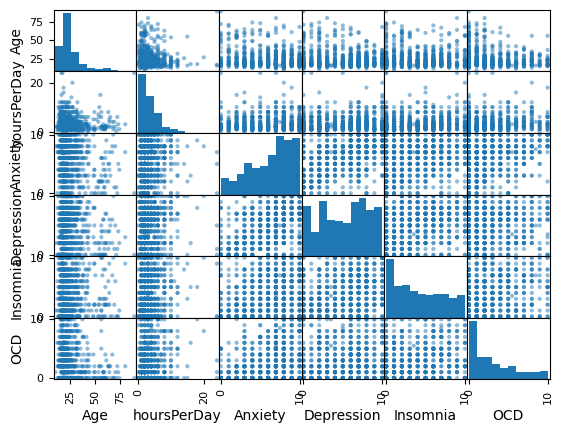

<Figure size 640x480 with 0 Axes>

In [242]:
scatter_matrix(df)
plt.show()
plt.savefig('plots/Scatter_matirx_ClassificationDataSet.png')


In [243]:
X = df.drop('musicEffects', axis='columns')
#from X the musicEffects column is deleted 
y = df.musicEffects #y is assigned with musicEffects feature
print(X.shape)
print(y.shape)

(724, 9)
(724,)


In [244]:
X = pd.get_dummies(X)#one hot encoding is done to categorical data into numeric data type.
X.head()

,Age,hoursPerDay,Anxiety,Depression,Insomnia,OCD,primaryStreamingService_Apple Music,primaryStreamingService_I do not use a streaming service.,primaryStreamingService_Other streaming service,primaryStreamingService_Pandora,...,favGenre_Jazz,favGenre_K pop,favGenre_Latin,favGenre_Lofi,favGenre_Metal,favGenre_Pop,favGenre_R&B,favGenre_Rap,favGenre_Rock,favGenre_Video game music
0,18,4.0,7.0,7.0,10.0,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,61,2.5,9.0,7.0,3.0,3.0,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,18,4.0,7.0,2.0,5.0,9.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,18,5.0,8.0,8.0,7.0,7.0,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,18,3.0,4.0,8.0,6.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [245]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2, stratify=y, random_state=2) 
#data set is split into training and testing data set.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(579, 30)
(579,)
(145, 30)
(145,)


In [246]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [248]:
#finding the best validation accuracy
for d in range(1,12):
    model = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Depth: ", d, "Validation Accuracy:", scores.mean())

Depth:  1 Validation Accuracy: 0.744392803598201
Depth:  2 Validation Accuracy: 0.721904047976012
Depth:  3 Validation Accuracy: 0.7357571214392804
Depth:  4 Validation Accuracy: 0.7236131934032983
Depth:  5 Validation Accuracy: 0.7132383808095952
Depth:  6 Validation Accuracy: 0.7167616191904047
Depth:  7 Validation Accuracy: 0.6960119940029985
Depth:  8 Validation Accuracy: 0.6856521739130435
Depth:  9 Validation Accuracy: 0.6614842578710644
Depth:  10 Validation Accuracy: 0.6528635682158921
Depth:  11 Validation Accuracy: 0.6407646176911543


In [249]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

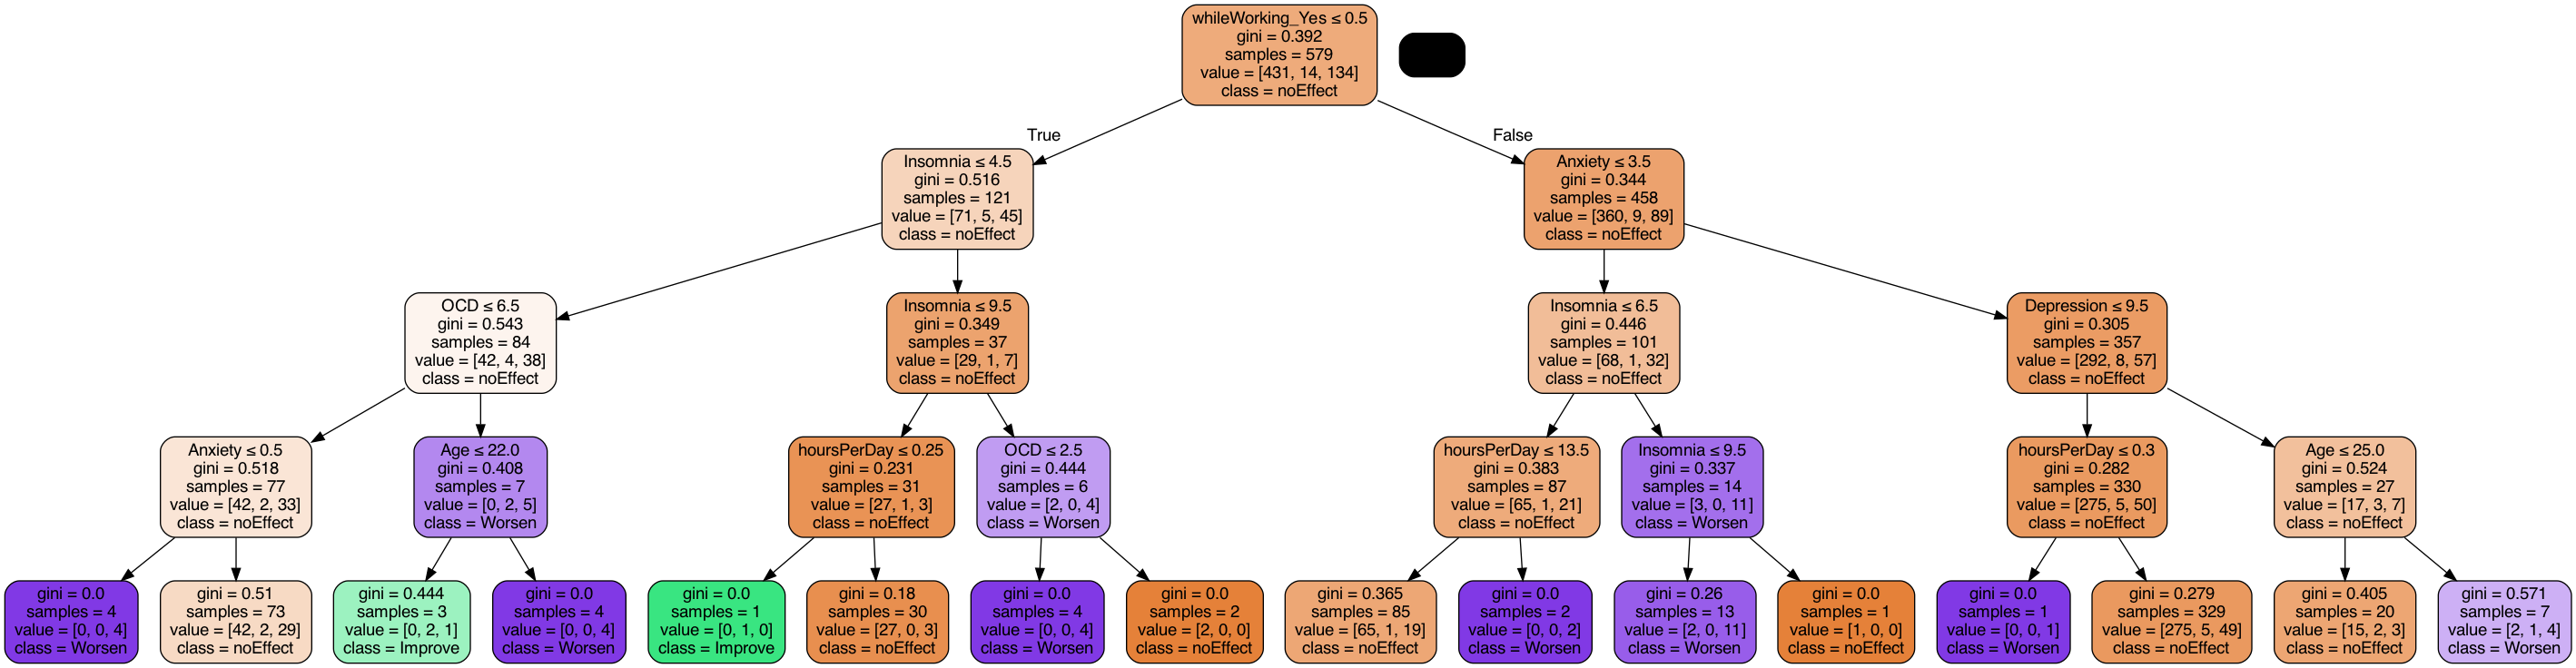

In [250]:
feature_names = X.columns
target_names = ["noEffect", "Improve", "Worsen"]
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/DecTree.png')
Image(graph.create_png())

In [ ]:
print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

In [ ]:
y_hat = model.predict(X_test)
cm = confusion_matrix(y_test, y_hat)
print("CM", cm)
print()

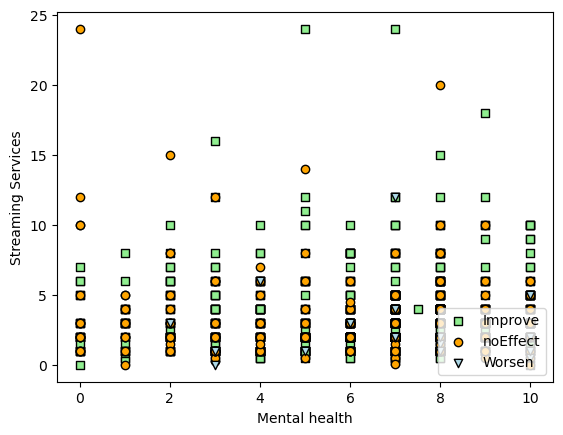

<Figure size 640x480 with 0 Axes>

In [251]:
d = np.array(df)
plt.scatter(
    d[d[:,9] == "Improve", 5], d[d[:,9] == "Improve", 2],
    c='lightgreen', marker='s', edgecolor='black',
    label='Improve'
)

plt.scatter(
    d[d[:,9] == "noEffect", 5], d[d[:,9] == "noEffect", 2],
    c='orange', marker='o', edgecolor='black',
    label='noEffect'
)

plt.scatter(
    d[d[:,9] == "Worsen", 5], d[d[:,9] == "Worsen", 2],
    c='lightblue', marker='v', edgecolor='black',
    label='Worsen'
)

plt.xlabel('Mental health')
plt.ylabel('Streaming Services')
plt.legend(loc="lower right")

plt.show()

plt.savefig('plots/scatterDecTree.png')


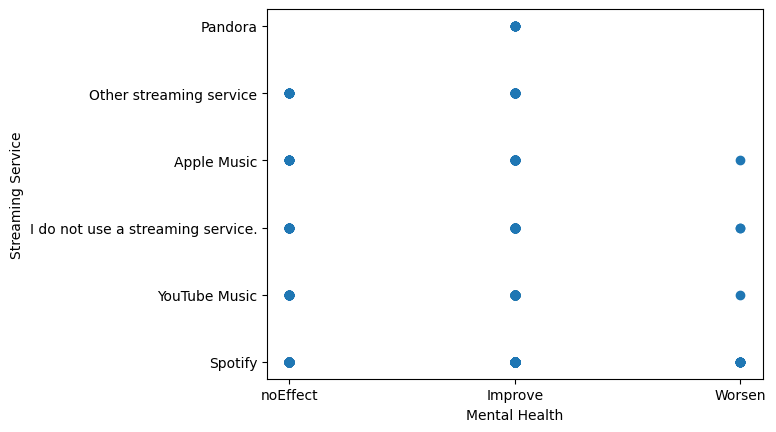

<Figure size 640x480 with 0 Axes>

In [252]:
plt.scatter(df.musicEffects, df.primaryStreamingService)
plt.xlabel("Mental Health")
plt.ylabel("Streaming Service")
plt.show()
plt.savefig('plots/MentalHealthVsStreamingService.png')



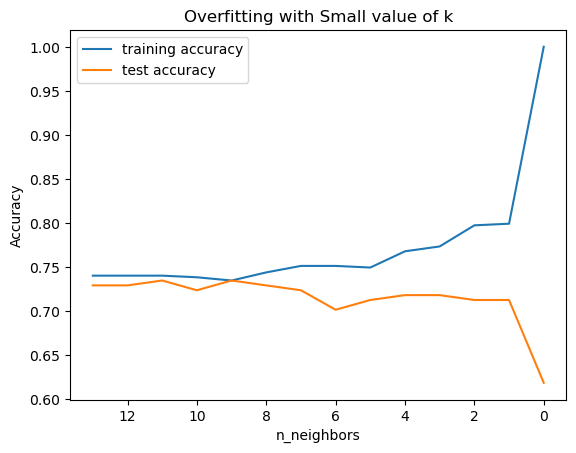

In [253]:
plt.plot(training_accuracy, label="training accuracy") 
plt.plot(test_accuracy, label="test accuracy") 
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Overfitting with Small value of k') 
ax = plt.gca()
ax.invert_xaxis() 
plt.savefig('plots/DecTree_overfitting.png')
